In [1]:
# encoding and decoding

s = "café"
s

'café'

In [158]:
b = s.encode(encoding='utf-8')
b

b'caf\xc3\xa9'

In [159]:
len(b)

5

In [160]:
cafe = bytes(s, encoding='utf-8')
cafe

b'caf\xc3\xa9'

In [161]:
# bytearray from str
cafe_array = bytearray(s, encoding='utf-8')
cafe_array

bytearray(b'caf\xc3\xa9')

In [162]:
cafe_array[0]

99

In [163]:
cafe_array[:3]

bytearray(b'caf')

In [164]:
# bytearray from bytes
bytearray(cafe)

bytearray(b'caf\xc3\xa9')

In [165]:
# bytearray of size n with null byte \x00
barr_zero = bytearray(10)
barr_zero

bytearray(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')

In [166]:
barr_zero[0]

0

In [167]:
b_arr = bytearray([1,2,3])
b_arr

bytearray(b'\x01\x02\x03')

In [27]:
bytes.fromhex('31 4B CE 49')

b'1K\xceI'

In [34]:
k = bytes([1,2,3])
k

b'\x01\x02\x03'

In [42]:
import array

numbers = array.array('i', [-2, -1, 0, 1, 2])
octets = bytes(numbers)
octets

b'\xfe\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00'

In [43]:
len(octets)

20

### Basic Encoders and decoders

In [ ]:


ustr = "El Ni\xF1o"
ustr

'El Niño'

In [54]:
print('hex, unicode, str')
chr(0xF1), '\u00F1', '\xF1'

hex, unicode, str


('ñ', 'ñ', 'ñ')

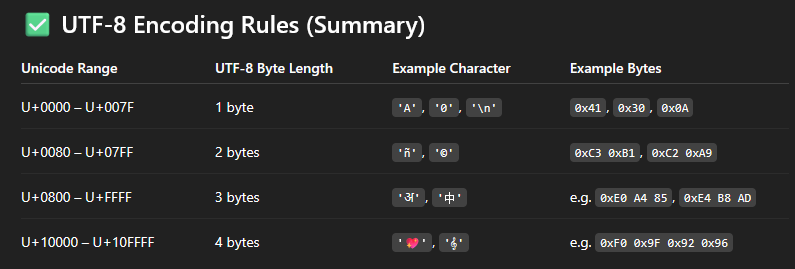

In [65]:
b = b'\xF1'
print(b.decode('utf-8'))  # ❌ UnicodeDecodeError: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 0: unexpected end of data

In [58]:
a = b'\x41'
a.decode('utf-8')

'A'

In [59]:
'A'.encode('utf-8'), 'ñ'.encode('utf-8')

(b'A', b'\xc3\xb1')

In [60]:
for codec in ['utf-8', 'latin-1', 'utf-16']:
    print(codec, 'El Niño'.encode(codec))

utf-8 b'El Ni\xc3\xb1o'
latin-1 b'El Ni\xf1o'
utf-16 b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'


### Encode/Decode Error

In [80]:
city = 'São Paulo'
try:
    city.encode('cp437')
except UnicodeEncodeError as e:
    print(e)

'charmap' codec can't encode character '\xe3' in position 1: character maps to <undefined>


In [84]:
city.encode('cp437', errors='ignore')   # loss of data

b'So Paulo'

In [85]:
city.encode('cp437', errors='replace') 

b'S?o Paulo'

In [86]:
city.encode('cp437', errors='xmlcharrefreplace')

b'S&#227;o Paulo'

In [89]:
try:
    b'\xF1'.decode('utf-8')
except UnicodeDecodeError as e:
    print(e)

'utf-8' codec can't decode byte 0xf1 in position 0: unexpected end of data


In [ ]:
# discover the encoding of byte sequence.
import chardet

In [92]:
chardet.detect(b'El Ni\xc3\xb1o')

{'encoding': 'utf-8', 'confidence': 0.505, 'language': ''}

In [94]:
# byte order mark (BOM) , b'\xff\xfe'  -> 255 254

u16 = 'El Niño'.encode('utf-16')
u16   

b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'

In [95]:
list(u16)

[255, 254, 69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111, 0]

In [98]:
u16le = 'El Niño'.encode('utf-16le')
print(u16le)
list(u16le)

b'E\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'


[69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111, 0]

In [99]:
u16be = 'El Niño'.encode('utf-16be')
print(u16be)
list(u16be)

b'\x00E\x00l\x00 \x00N\x00i\x00\xf1\x00o'


[0, 69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111]

### Handeling Text Files

In [100]:
with open('cafe.txt', 'w', encoding='utf-8') as fp:
    print(f'{fp!r}')
    fp.write('café')


<_io.TextIOWrapper name='cafe.txt' mode='w' encoding='utf-8'>


In [101]:
import os
os.stat('cafe.txt').st_size

5

In [103]:
with open('cafe.txt') as fp2:
    print(f'{fp2!r}')
    print(fp2.read())

<_io.TextIOWrapper name='cafe.txt' mode='r' encoding='UTF-8'>
café


In [104]:
with open('cafe.txt', 'rb') as fp3:
    print(f'{fp3!r}')
    print(fp3.read())

<_io.BufferedReader name='cafe.txt'>
b'caf\xc3\xa9'


### Encoding Defaults

In [88]:
import sys, locale

In [113]:
expressions = """
locale.getpreferredencoding()
sys.stdout.isatty()
sys.stdout.encoding
sys.stdin.isatty()
sys.stdin.encoding
sys.stderr.isatty()
sys.getdefaultencoding()
sys.getfilesystemencoding()
"""

for exp in expressions.strip().split("\n"):
    val = eval(exp)
    print(f"{exp} -> {val}")

locale.getpreferredencoding() -> UTF-8
sys.stdout.isatty() -> False
sys.stdout.encoding -> UTF-8
sys.stdin.isatty() -> False
sys.stdin.encoding -> utf-8
sys.stderr.isatty() -> False
sys.getdefaultencoding() -> utf-8
sys.getfilesystemencoding() -> utf-8


In [7]:
import unicodedata

TypeError: name() argument 1 must be a unicode character, not str

In [130]:
chars = ['è', 'î', '©', '¥']
for c in chars:
    print(f"{c} -> {unicodedata.name(c)}")

è -> LATIN SMALL LETTER E WITH GRAVE
î -> LATIN SMALL LETTER I WITH CIRCUMFLEX
© -> COPYRIGHT SIGN
¥ -> YEN SIGN


In [149]:
chars1 = ['\u00EA', '\u00EE', '\u00A9', '\u00A5']
for c in chars1:
    print(f"{c:<3} -> {bytes(c, encoding='utf-8')} {unicodedata.name(c)}")

ê   -> b'\xc3\xaa' LATIN SMALL LETTER E WITH CIRCUMFLEX
î   -> b'\xc3\xae' LATIN SMALL LETTER I WITH CIRCUMFLEX
©   -> b'\xc2\xa9' COPYRIGHT SIGN
¥   -> b'\xc2\xa5' YEN SIGN


In [156]:
test_chars = ['\N{HORIZONTAL ELLIPSIS}',
              '\N{INFINITY}',
              '\N{CIRCLED NUMBER FORTY TWO}']

for c in test_chars:
    print(f"{c:<10} -> {unicodedata.name(c)}")

…          -> HORIZONTAL ELLIPSIS
∞          -> INFINITY
㊷          -> CIRCLED NUMBER FORTY TWO


### Normalizing Unicode

In [25]:
s1 = 'café'
s2 = 'cafe\N{COMBINING ACUTE ACCENT}'
s1, s2

('café', 'café')

In [26]:
len(s1), len(s2), s1 ==  s2

(4, 5, False)

In [27]:
bytes(s1, encoding='utf-8')

b'caf\xc3\xa9'

In [28]:
bytes(s2, encoding='utf-8')

b'cafe\xcc\x81'

In [33]:

unicodedata.normalize('NFC', s1) == unicodedata.normalize('NFC', s2)

True

In [35]:
bytes(unicodedata.normalize('NFC', s1), encoding='utf-8'), bytes(unicodedata.normalize('NFC', s2), encoding='utf-8')

(b'caf\xc3\xa9', b'caf\xc3\xa9')

In [39]:
bytes(unicodedata.normalize('NFD', s1), encoding='utf-8'), bytes(unicodedata.normalize('NFD', s2), encoding='utf-8')

(b'cafe\xcc\x81', b'cafe\xcc\x81')

In [51]:
half = "\N{VULGAR FRACTION ONE HALF}"
half, '\u00BD'

('½', '½')

In [44]:
for c in half:
    print(c)

½


In [52]:
unicodedata.normalize('NFKC', half)

'1⁄2'

In [53]:
for c in unicodedata.normalize('NFKD', half):
    print(f"{c} {unicodedata.name(c)}")

1 DIGIT ONE
⁄ FRACTION SLASH
2 DIGIT TWO


In [ ]:
# remove combining marks
# A diacritic is a glyph added to a base character to change its sound, meaning, or stress. é = e + acute accent
# A combining mark is a non-spacing character that attaches to the preceding character. It is not shown on its own, but modifies the previous character.
# é	U+0065 + U+0301	Latin "e" + acute accent

def shave_marks(msg: str, normalize_method='NFD') -> str:
    msg = unicodedata.normalize(normalize_method, msg)
    return ''.join(c for c in msg if not unicodedata.combining(c))


In [68]:
order = '“Herr Voß: • ½ cup of Œtker™ caffè latte • bowl of açaí.”'
shave_marks(order, 'NFD')

'“Herr Voß: • ½ cup of Œtker™ caffe latte • bowl of acai.”'

In [69]:
shave_marks(order, 'NFKD')

'“Herr Voß: • 1⁄2 cup of ŒtkerTM caffe latte • bowl of acai.”'

In [79]:
# transformation

"hello there".translate(str.maketrans({'e': '@'}))

'h@llo th@r@'

In [83]:
single_map = str.maketrans("""‚ƒ„†ˆ‹‘’“”•–—˜›""",  # <1>
                           """'f"*^<''""---~>""")

multi_map = str.maketrans({  # <2>
    '€': '<euro>',
    '…': '...',
    'Œ': 'OE',
    '™': '(TM)',
    'œ': 'oe',
    '‰': '<per mille>',
    '‡': '**',
})

multi_map.update(single_map)
multi_map

{8364: '<euro>',
 8230: '...',
 338: 'OE',
 8482: '(TM)',
 339: 'oe',
 8240: '<per mille>',
 8225: '**',
 8218: 39,
 402: 102,
 8222: 34,
 8224: 42,
 710: 94,
 8249: 60,
 8216: 39,
 8217: 39,
 8220: 34,
 8221: 34,
 8226: 45,
 8211: 45,
 8212: 45,
 732: 126,
 8250: 62}

In [85]:
print(order)
order.translate(multi_map)

“Herr Voß: • ½ cup of Œtker™ caffè latte • bowl of açaí.”


'"Herr Voß: - ½ cup of OEtker(TM) caffè latte - bowl of açaí."'

In [58]:
unicode_words = [
    "mañana",       # Spanish (ñ = U+00F1)
    "crème",        # French (è = U+00E8)
    "façade",       # French (ç = U+00E7)
    "你好",          # Chinese (你 = U+4F60, 好 = U+597D)
    "さようなら",    # Japanese Hiragana (さ = U+3055)
    "über",         # German (ü = U+00FC)
    "кофе",         # Russian Cyrillic (к = U+043A)
    "σχολείο",      # Greek (σ = U+03C3)
    "Ωmega",        # Greek capital omega (Ω = U+03A9)
    "😊",            # Emoji (smiling face = U+1F60A)
]

unicode_words

['mañana',
 'crème',
 'façade',
 '你好',
 'さようなら',
 'über',
 'кофе',
 'σχολείο',
 'Ωmega',
 '😊']

In [59]:
sorted(unicode_words)

['crème',
 'façade',
 'mañana',
 'über',
 'Ωmega',
 'σχολείο',
 'кофе',
 'さようなら',
 '你好',
 '😊']

In [89]:
sorted(unicode_words, key=locale.strxfrm)

['crème',
 'façade',
 'mañana',
 'über',
 'Ωmega',
 'σχολείο',
 'кофе',
 'さようなら',
 '你好',
 '😊']

In [101]:
### Character finder

def char_find(words):
    start, stop = ord(' '), sys.maxunicode + 1
    words = {x.upper() for x in words}
    for code in range(start, stop):
        c = chr(code)
        name = unicodedata.name(c, None)
        if name and words.issubset(name.split(" ")):
            print(f"U+{code}", c, name, end="\t")
            print()

words = "cat smiling"
char_find(words.split())


U+128568 😸 GRINNING CAT FACE WITH SMILING EYES	
U+128570 😺 SMILING CAT FACE WITH OPEN MOUTH	
U+128571 😻 SMILING CAT FACE WITH HEART-SHAPED EYES	


'a'

'LATIN CAPITAL LETTER A'